In [17]:
import quandl
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_datareader as web
import panel as pn
from datetime import datetime

In [18]:
quandl.ApiConfig.api_key = "LzPif8exqBstehSaxNMp"
df = quandl.get("MULTPL/SP500_PE_RATIO_MONTH")

In [19]:
df = df[df.index>='1999-01-01']

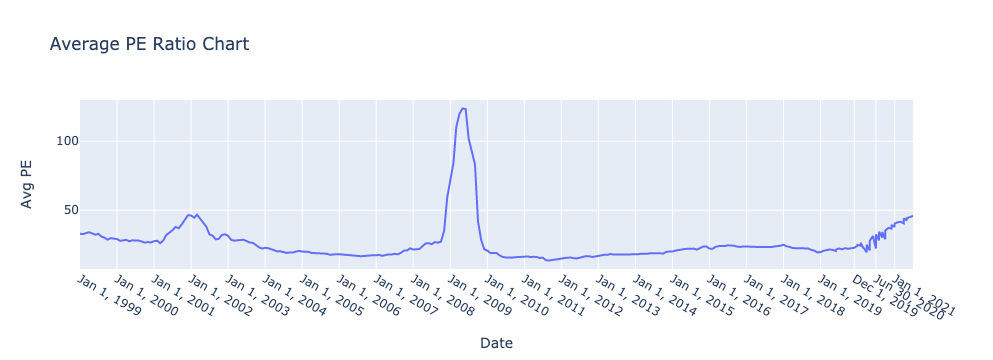

In [20]:
fig = px.line(df, x=df.index, y="Value" ,  labels={"Value": "Avg PE"} , title='Average PE Ratio Chart')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df.index[::12]
    ))
fig

In [21]:
# Are we in a bubble considering traditional measures?

# Well, there are many metrics we could look at to try to determine this, we have plotted an average PE ratio of the biggest 500 companies in the US, and here is what
# we found out, 

# price per earnings are hovering around 45, thats means and investor would take an average of 45 years to get a return on his investment, of course we are not considering things 
# such as growth of sales and gros of profits or increase margins and net income.

# That said, this puts us in a territory seen in the 2000 dot com bubble before it busted. but not nearly close to levels in the 2008 bubble of aproximatelly 128.

# To simply put it in perpective, either investors are ok with getting verry little returns and yield on their money or the sentiment of growth overall on the biggest US complies are very bullish.

# This metric doesnt say it all tho, stocks can have high multiples suche as PE and still be considerated not in a bubble territory, specially if you compare with Bonds for example that would have usually much higher multiples.




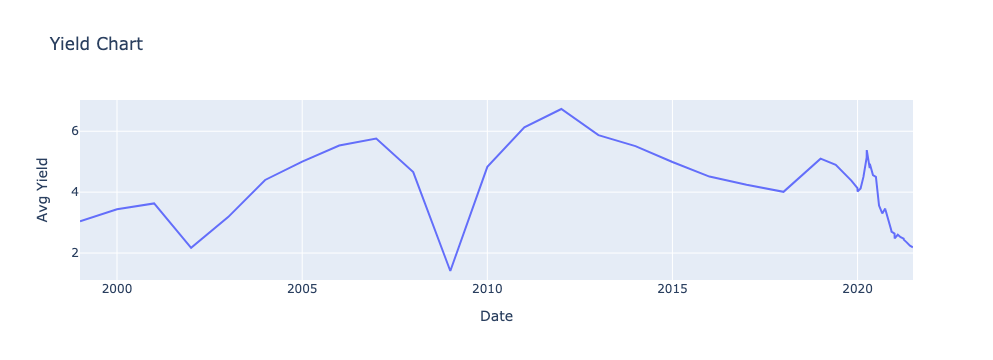

In [22]:
yield_df = quandl.get("MULTPL/SP500_EARNINGS_YIELD_YEAR")
yield_df = yield_df[yield_df.index>='1999-01-01']
fig2 = px.line(yield_df, x=yield_df.index, y="Value", title='Yield Chart', labels={
                     "Value": "Avg Yield"})
fig2

In [23]:
# Create a Title for the Dashboard
dashboard_title = pn.pane.Markdown(
    """
#An analysis of the stock market: are we facing a bubble?
""",
    width=800,
)


# Define an introductory text
dashboard_introduce =pn.pane.Markdown(
    """
The dashboard presents our findings of whether the stock markets are currently in bubble.
"""
)

# Combine the two plots with interest rates in a row for better comparison and illustration
two_graphs = pn.Row (fig, fig2)

#  Establish the first tab as "Home" tab with the title and welcome and combine with the plots related to SP500 performance, money supply, and GDP data
dashboard_page = pn.Column (dashboard_title, dashboard_introduce, two_graphs)


# Create the main dashboard with each tabs being defined above
dashboard_tabs = pn.Tabs(             
                ("Welcome", two_graphs)
                #("Price to Earning", ),
                #("Sentimental Measure", )
                        )

dashboard = pn.Column(pn.Row(dashboard_title), dashboard_tabs, width=900)

In [24]:
pn.extension()
dashboard.servable()

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)